<a href="https://colab.research.google.com/github/MalihaSaghir/AI-ML-Internship-tasks/blob/main/Week1(with_Heart_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix



In [ ]:

dataset = pd.read_csv("/content/drive/MyDrive/heart (1).csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# DATA PREPROCESSING: check for missing values
dataset.isnull().sum()  # Check for missing values


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# NORMALIZATION: Scale numerical features using StandardScalers
scaler = StandardScaler()
numeric_features = ['age', 'chol', 'trestbps']
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])


In [ ]:
# ENCODE CATEGORICAL FEATURES: In this dataset there is no categorical column

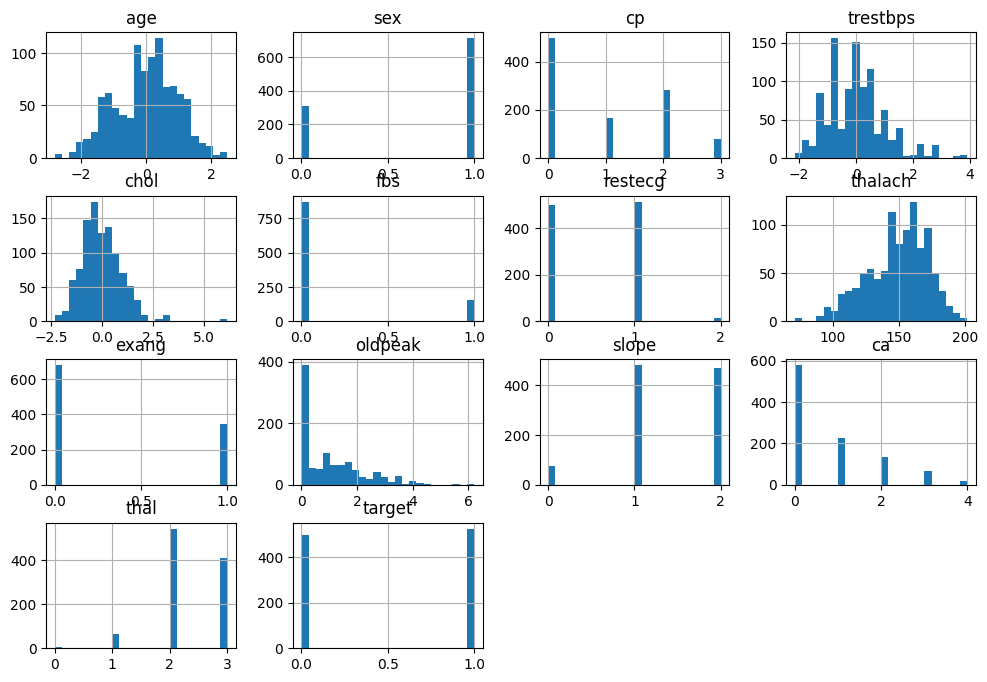

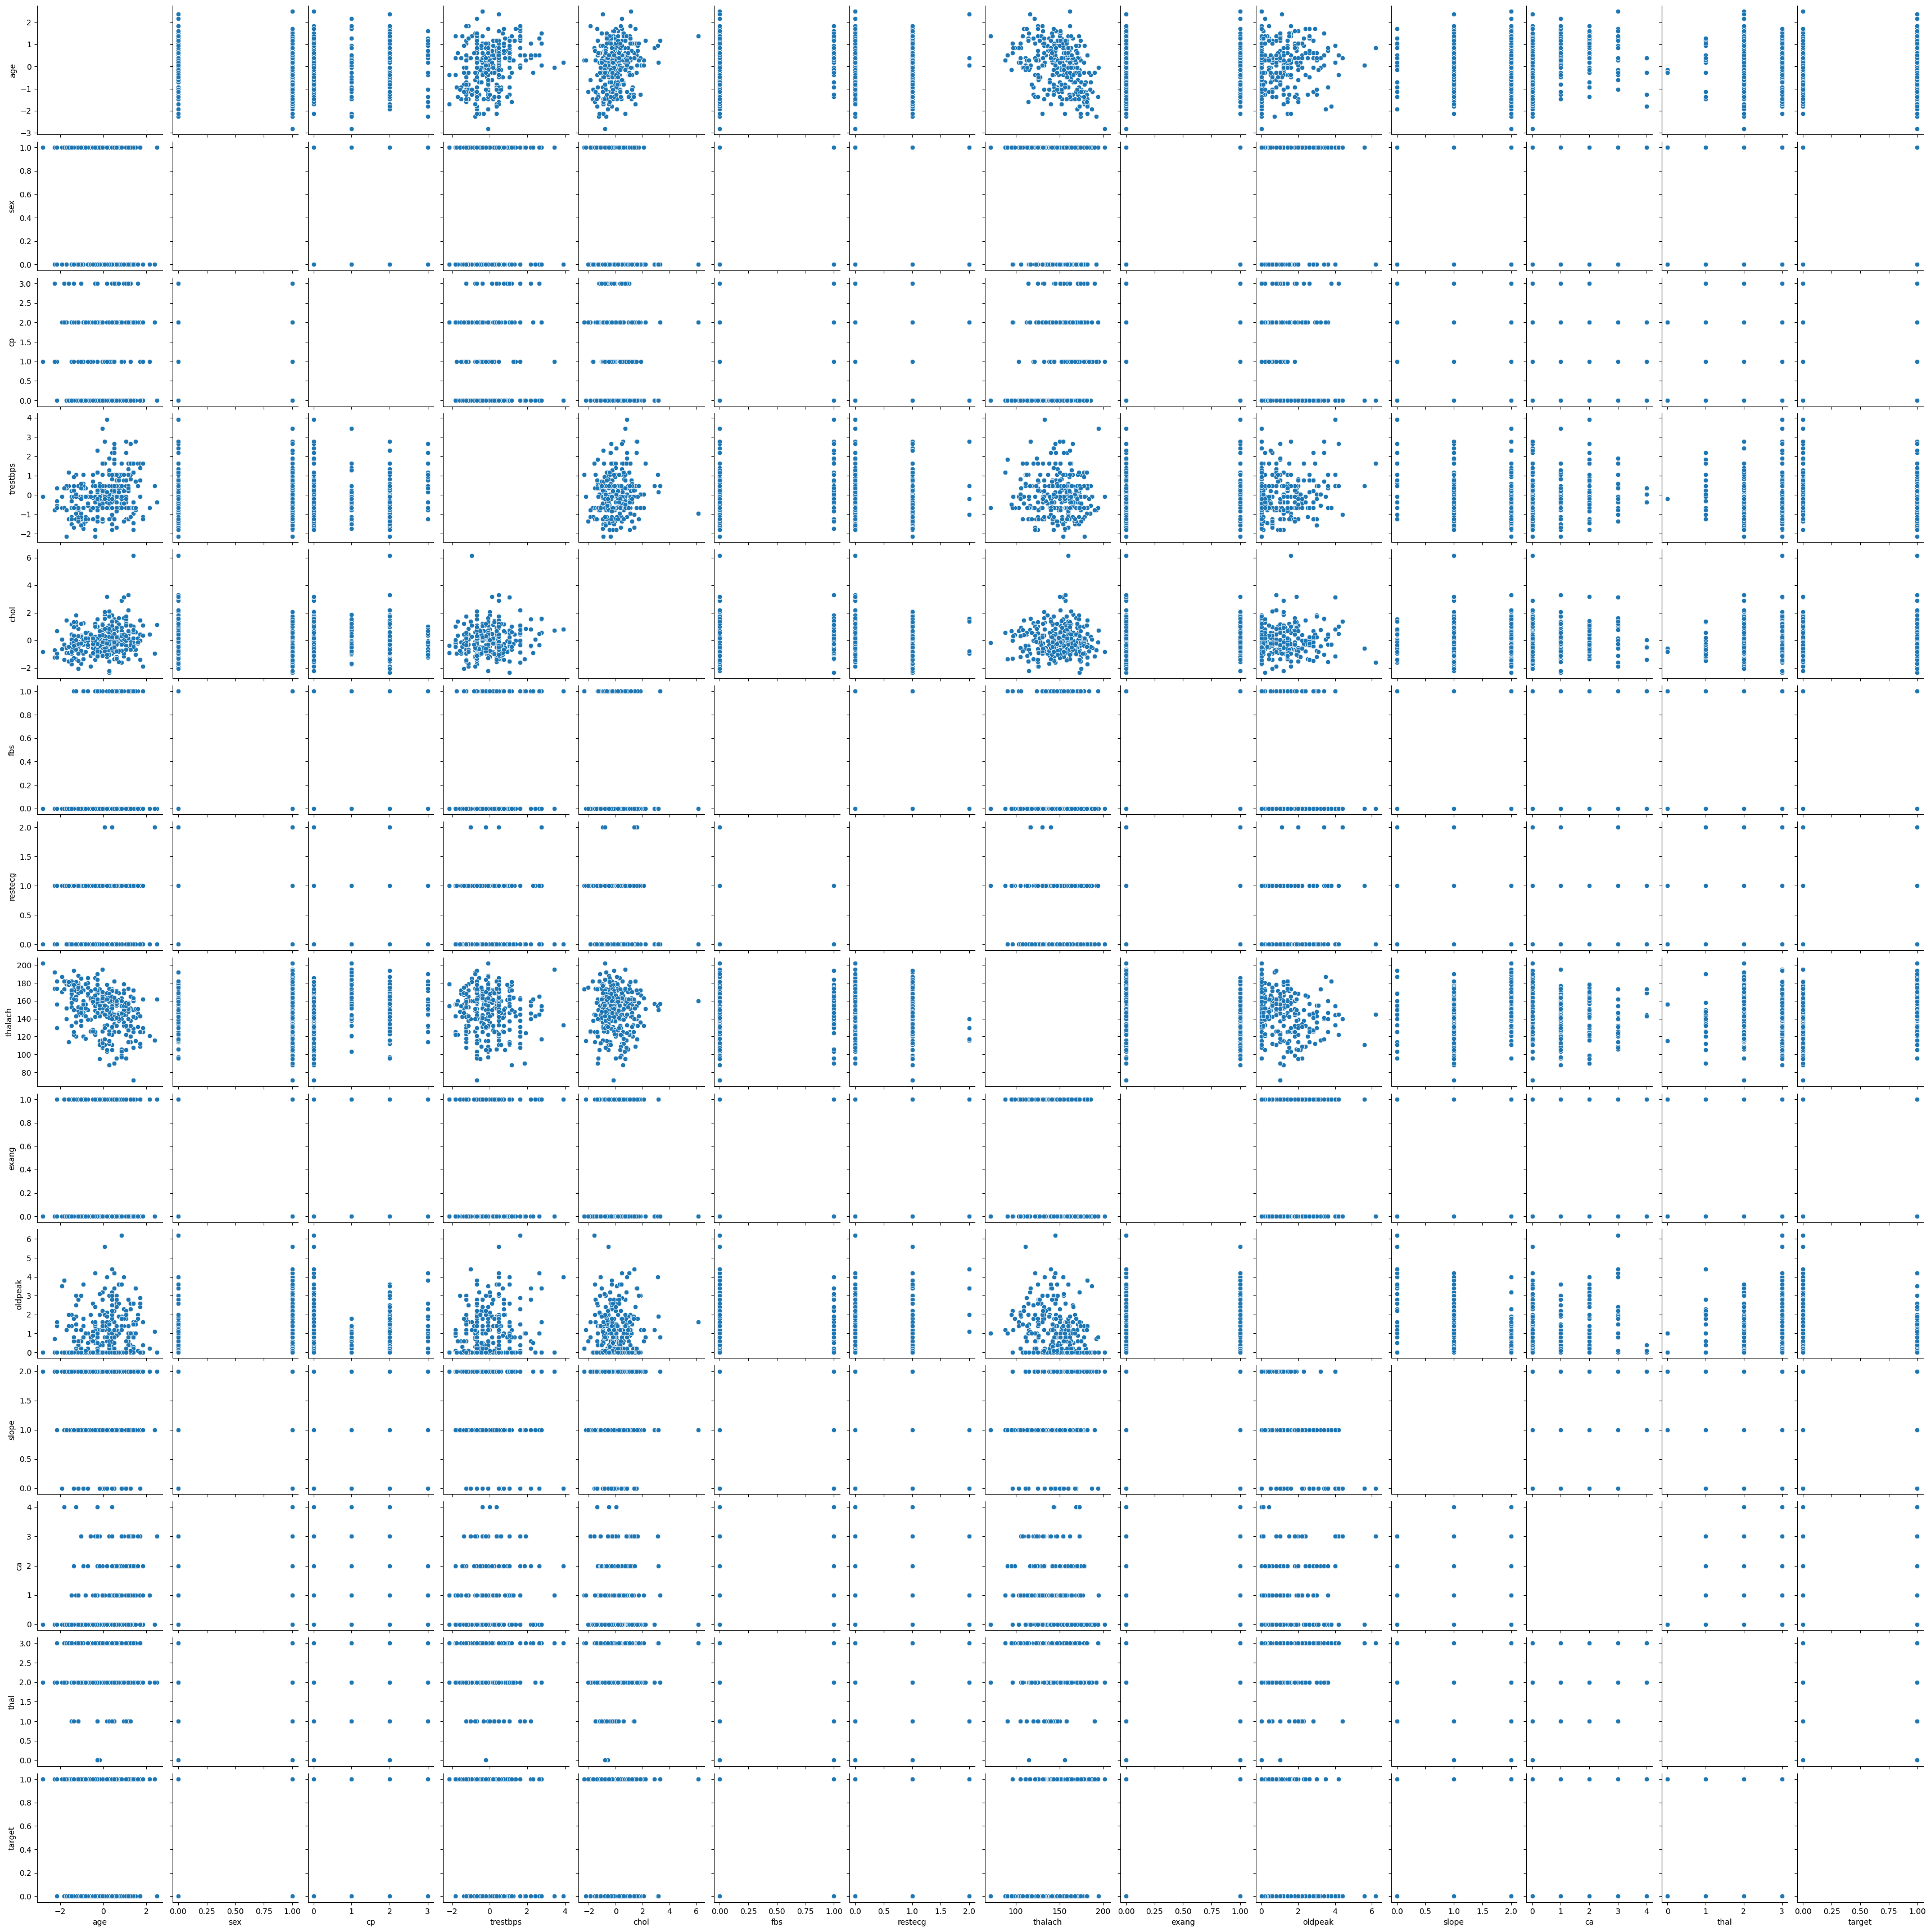

In [ ]:
# EXPLORATORY DATASET ANALYSIS (EDA)
# 1. ANALYZE FEATURE DIRSTRIBUTIONS:  Use histograms and scatter plots

dataset.hist(bins=24, figsize=(12, 8))
plt.show()

sns.pairplot(dataset, diag_kind='age')
plt.show()

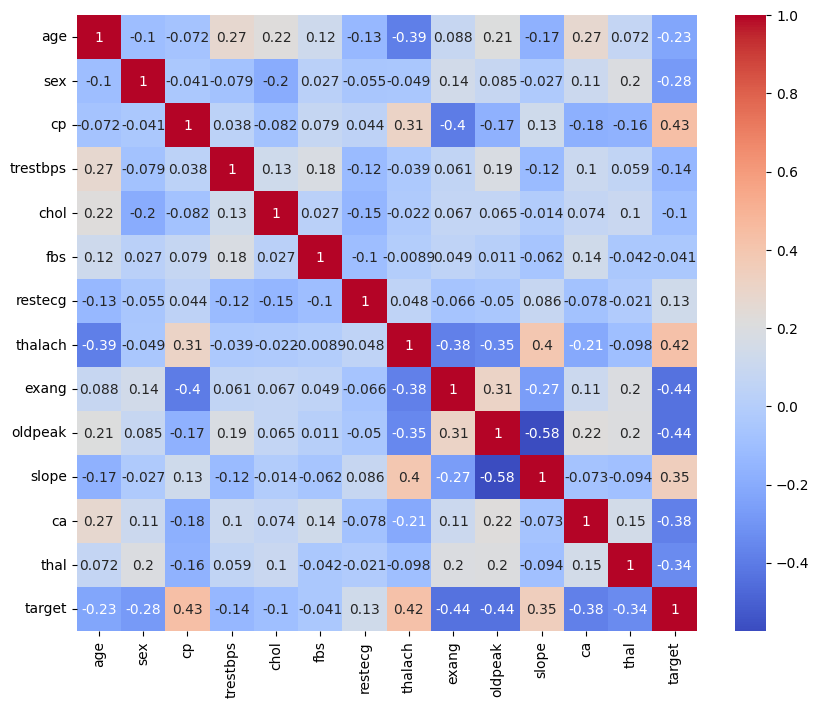

In [ ]:
# CORRELATION ANALYSIS:  HEAT MAP TO VISUALIZE CORRELATIONS

plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# SPLIT DATA INTO TRAINING AND TESTING SETS

In [ ]:
# Divide that datasets into features (X) and target (Y), and
# split into train and test sets

X = dataset.drop('target', axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# TRAIN MACHINE LEARNING MODELS
# LOGISTIC REGRESSION

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [ ]:
# RANDOM FOREST

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_scaled, y_train)

# Best parameters and retrain model
print("Best Parameters:", grid.best_params_)
svm_predictions_tuned = svm_model_tuned.predict(X_test_scaled)
svm_model_tuned = grid.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

In [ ]:
# EVALUATE MODELS
# USE METRICS LIKE ACCURACY, PRECISION, RECALL, F1-SCORE TO
# EVALUATE MODEL PERFORMANCE

Logistic Regression:
Accuracy: 0.80
Precision: 0.76
Recall: 0.87
F1 Score: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



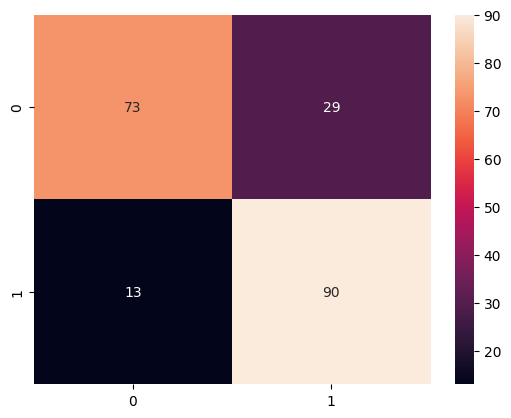

Random Forest:
Accuracy: 0.99
Precision: 1.00
Recall: 0.97
F1 Score: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



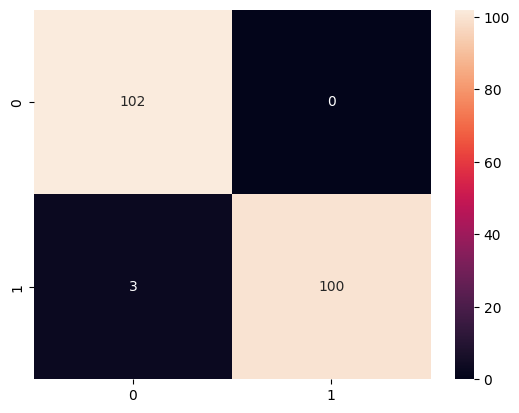

Tuned SVM Model:
Accuracy: 0.99
Precision: 1.00
Recall: 0.97
F1 Score: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



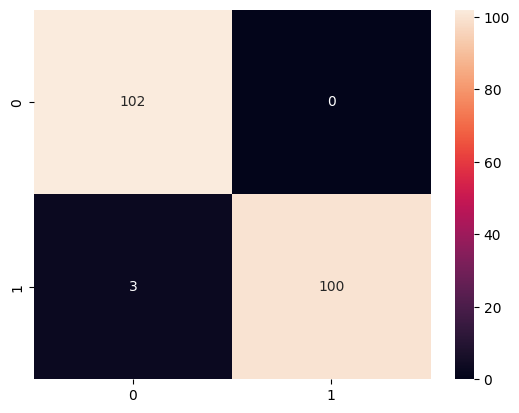

In [ ]:
def evaluate_model(y_test, predictions):
    print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
    print(f"Precision: {precision_score(y_test, predictions):.2f}")
    print(f"Recall: {recall_score(y_test, predictions):.2f}")
    print(f"F1 Score: {f1_score(y_test, predictions):.2f}")
    print("\nClassification Report:\n", classification_report(y_test, predictions))
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')
    plt.show()

# Evaluate each model
print("Logistic Regression:")
evaluate_model(y_test, lr_predictions)

print("Random Forest:")
evaluate_model(y_test, rf_predictions)

print("Tuned SVM Model:")
evaluate_model(y_test, svm_predictions_tuned)


Model Performance Summary:
              Model  Accuracy  Precision  Recall  F1-Score
Logistic Regression      0.80       0.76    0.87      0.81
      Random Forest      0.99       1.00    0.97      0.99
          Tuned SVM      0.99       1.00    0.97      0.99


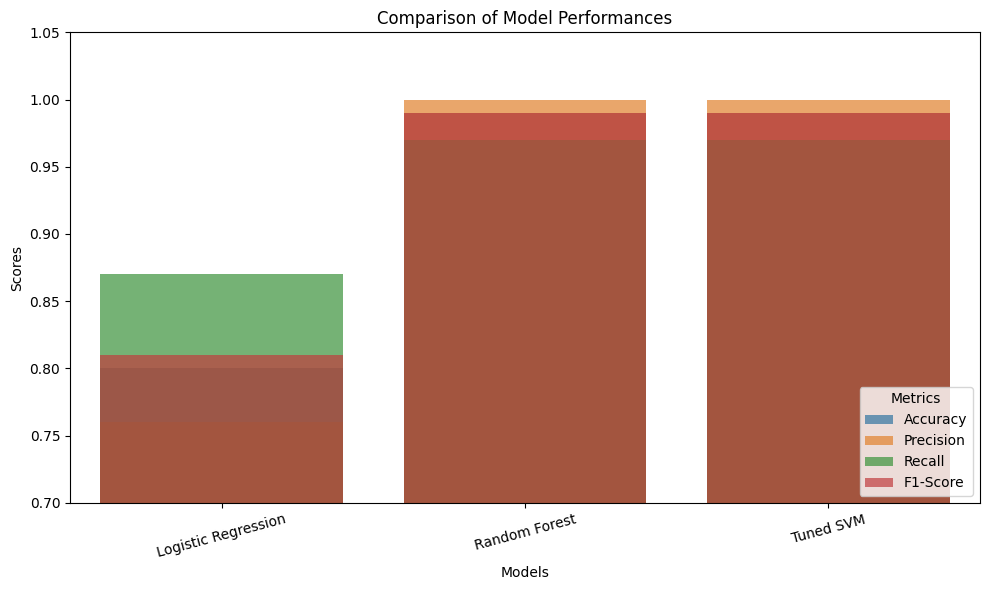

In [ ]:
# Comparing the results

# Model performance metrics

results = {
    "Model": ["Logistic Regression", "Random Forest", "Tuned SVM"],
    "Accuracy": [0.80, 0.99, 0.99],
    "Precision": [0.76, 1.00, 1.00],
    "Recall": [0.87, 0.97, 0.97],
    "F1-Score": [0.81, 0.99, 0.99],
}

# Create a DataFrame for tabular format
results_df = pd.DataFrame(results)

# Display the table
print("Model Performance Summary:")
print(results_df.to_string(index=False))

# Plot the bar plot for comparison
plt.figure(figsize=(10, 6))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

for metric in metrics:
    sns.barplot(x="Model", y=metric, data=results_df, label=metric, alpha=0.7)

plt.title("Comparison of Model Performances")
plt.ylabel("Scores")
plt.xlabel("Models")
plt.ylim(0.7, 1.05)
plt.legend(loc="lower right", title="Metrics")
plt.xticks(rotation=15)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Conclusions
# Random Forest and SVM outperformed Logistic Regression by a significant margin in all metrics.
# Both Random Forest and SVM showed near-identical performance, with Random Forest slightly
# edging out in interpretability and feature importance analysis.

In [ ]:
# Best-Performing Algorithm
# Random Forest is identified as the best-performing algorithm due to its high accuracy,
# robust performance across metrics and ability to provide feature importance insights.
# It is also less sensitive to feature scaling compared to SVM.


In [ ]:
# Conclusion
# The project demonstrated the effectiveness of machine learning in predicting heard disease.
# Random Forest and SVM models achieved superior performance, with Random Forest being the
# recommended model for deployment due to its interpretability.